One of the major problem that a Data Analyst/Scientist come accross is handeling missing datas. The main objective of this project is to apply various ways of handling missing data.

First we need to know what are the various ways we can handle missing data:
1) Complete case analysis: Removing the rows containing the missing value
2) Univariate: We apply different methods for numerical and categorical data
   2.a) Numerical Data: Mean/Median, Random, End of distribution
   2.b) Categorical Data: Mode, Missing
3) Multivariate: 
   3.a) KNN imputer
   3.b) Iterative imputer

In this project we will focuse mainly on removing rows and univariate methods. We will do a detailed statistical analysis and comparison of all the methods. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("data-science-job.csv")
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,0,0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,1,1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,2,2,2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,3,3,3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,4,4,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df = df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

### Complete case analysis:
Complete case analysis is a method of handling missing data that involves removing any observations or cases with missing data from the analysis. This can be a useful method for handling missing data when the missing data is minimal and does not significantly affect the results of the analysis.

In [5]:
cca=[]
for i in df.columns:
    if df[i].isnull().mean()*100<5 and df[i].isnull().mean()*100>0:
        cca.append(i)
cca

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In this dataset we have 5 columns which have missing values less than 5%. We can use CCA for these columns. Out of the 5 columns there are 3 numerical columns and 2 categorical columns. 

In [6]:
df[cca].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
15988,0.920,no_enrollment,Graduate,13.0,57.0
748,0.920,no_enrollment,Graduate,20.0,55.0
18954,0.910,NaN,Graduate,14.0,80.0
12940,0.725,Part time course,Masters,6.0,74.0
4396,0.698,Part time course,High School,2.0,47.0


In [7]:
#how much data will be left after after dropping the column
len(df[cca].dropna())/len(df)

0.8968577095730244

In [8]:
df_new=df[cca].dropna()

#how many columns we have now
df.shape, df_new.shape

((19158, 13), (17182, 5))

Lets first visualise the distribution of the 3 numerical columns before dropping the rows with missing data.

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

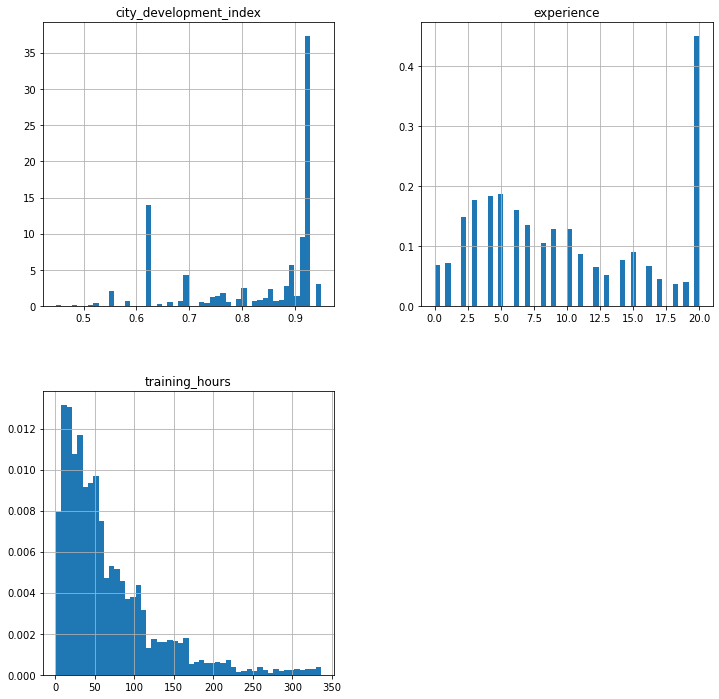

In [9]:
#plotting histogram for the actual dataset
df[cca].hist(bins=50, density=True, figsize=(12, 12))

Now lets visualise the distribution after dropping the null values

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

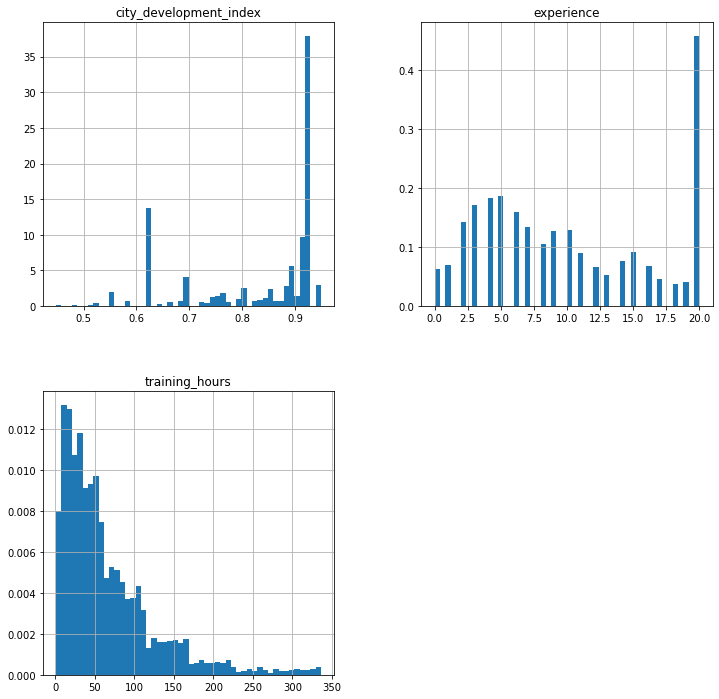

In [10]:
#plotting histogram for the new dataset after dropping the null values
df_new.hist(bins=50, density=True, figsize=(12, 12))

#### Comparison of the distribution for actual and new data

Red color is for the actual data, 
Green color is after CCA

<AxesSubplot:>

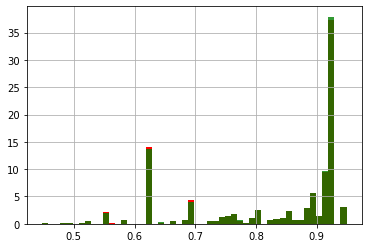

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca
df_new['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

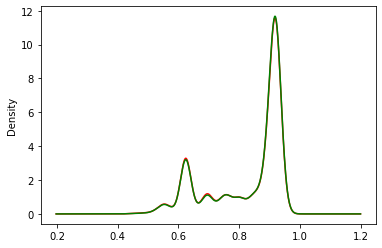

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
df_new['city_development_index'].plot.density(color='green')

<AxesSubplot:>

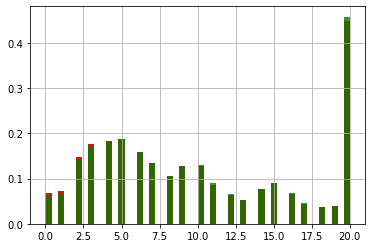

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca
df_new['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

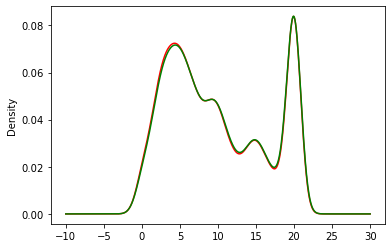

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
df_new['experience'].plot.density(color='green')

<AxesSubplot:>

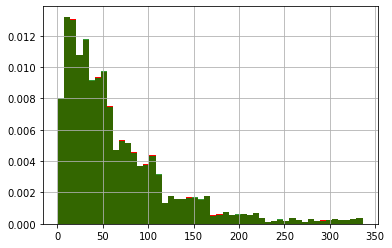

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca
df_new['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

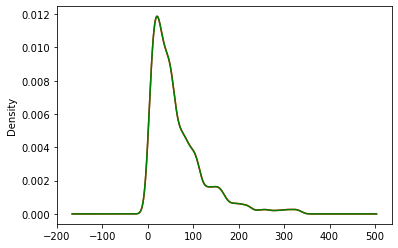

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
df_new['training_hours'].plot.density(color='green')

As can be seen from the plots the distribution of the data does not get affected after application of CCA

#### CCA for categorical data

In [17]:
prcnt_chng = pd.concat([df['enrolled_university'].value_counts() / len(df),
                        df_new['enrolled_university'].value_counts() / len(df_new)], axis=1)

prcnt_chng.columns = ['original', 'after_cca']
prcnt_chng

,original,after_cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [18]:
prcnt_chng = pd.concat([df['education_level'].value_counts() / len(df),
                        df_new['education_level'].value_counts() / len(df_new)], axis=1)

prcnt_chng.columns = ['original', 'after_cca']
prcnt_chng

,original,after_cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


As can be seen there is not much difference in the percentage change before and after applying the CCA on the cayegorical columns

#### Advantages of CCA:
It is easy to implement and the distribution of the data is preserved
#### Disadvantages of CCA:
It can exclude large volume of data and the model wouldn't know how to handle missing data

### Univariate method:

#### Mean/Median Imputation:

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [21]:
X = df.drop(columns=['target'])
y = df['target']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
X_train.shape, X_test.shape

((15326, 12), (3832, 12))

In [24]:
X_train.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.551220
gender                    23.548219
relevent_experience        0.000000
enrolled_university        1.918309
education_level            2.427248
major_discipline          14.667885
experience                 0.319718
company_size              31.019183
company_type              32.043586
training_hours             3.980164
dtype: float64

In [25]:
mean_city_development_index = X_train['city_development_index'].mean()
median_city_development_index = X_train['city_development_index'].median()

mean_experience = X_train['experience'].mean()
median_experience = X_train['experience'].median()


mean_training_hours = X_train['training_hours'].mean()
median_training_hours = X_train['training_hours'].median()

In [26]:
X_train['mean_city_development_index'] = X_train['city_development_index'].fillna(mean_city_development_index)
X_train['median_city_development_index'] = X_train['city_development_index'].fillna(median_city_development_index)


X_train['mean_experience'] = X_train['experience'].fillna(mean_experience)
X_train['median_experience'] = X_train['experience'].fillna(median_experience)

X_train['mean_training_hours'] = X_train['training_hours'].fillna(mean_training_hours)
X_train['median_training_hours'] = X_train['training_hours'].fillna(median_training_hours)

In [27]:
X_train.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,mean_city_development_index,median_city_development_index,mean_experience,median_experience,mean_training_hours,median_training_hours
14485,10032,city_98,0.949,Male,No relevent experience,no_enrollment,Masters,Business Degree,16.0,10000+,Pvt Ltd,23.0,0.949,0.949,16.0,16.0,23.0,23.0
17344,7565,city_73,0.754,Male,No relevent experience,Full time course,Graduate,STEM,8.0,NaN,NaN,44.0,0.754,0.754,8.0,8.0,44.0,44.0
4910,2154,city_50,0.896,Male,Has relevent experience,no_enrollment,Masters,STEM,17.0,10000+,Pvt Ltd,78.0,0.896,0.896,17.0,17.0,78.0,78.0
12794,15416,city_36,0.893,Male,No relevent experience,no_enrollment,Masters,Business Degree,11.0,100-500,Pvt Ltd,90.0,0.893,0.893,11.0,11.0,90.0,90.0
3984,29599,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Pvt Ltd,18.0,0.926,0.926,20.0,20.0,18.0,18.0


We will see how the variance of the data is changing after applying the mean/median imputation. 

In [28]:
print('Original city_development_index variable variance: ', X_train['city_development_index'].var())
print('city_development_index Variance after median imputation: ', X_train['median_city_development_index'].var())
print('city_development_index Variance after mean imputation: ', X_train['mean_city_development_index'].var())

print('Original experience variable variance: ', X_train['experience'].var())
print('experience Variance after median imputation: ', X_train['median_experience'].var())
print('experience Variance after mean imputation: ', X_train['mean_experience'].var())

print('Original training_hours variable variance: ', X_train['training_hours'].var())
print('training_hours Variance after median imputation: ', X_train['median_training_hours'].var())
print('training_hours Variance after mean imputation: ', X_train['mean_training_hours'].var())

Original city_development_index variable variance:  0.015232596622262501
city_development_index Variance after median imputation:  0.014981311927511435
city_development_index Variance after mean imputation:  0.014843954189681324
Original experience variable variance:  42.31272262041923
experience Variance after median imputation:  42.180276296408245
experience Variance after mean imputation:  42.17743234907142
Original training_hours variable variance:  3605.7523453683752
training_hours Variance after median imputation:  3474.8349974528187
training_hours Variance after mean imputation:  3462.228108456481


As can be seen from the results there is not much srinkage in the varience after the application of the mean/median imputation

Now we will visualise how the distribution is changing before and after application of the mean/median imputation.

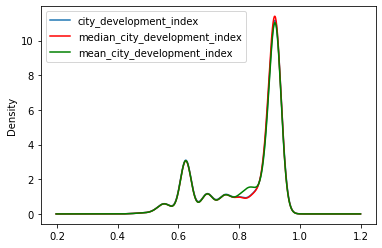

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['city_development_index'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['median_city_development_index'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['mean_city_development_index'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

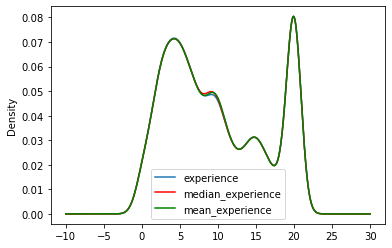

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['experience'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['median_experience'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['mean_experience'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

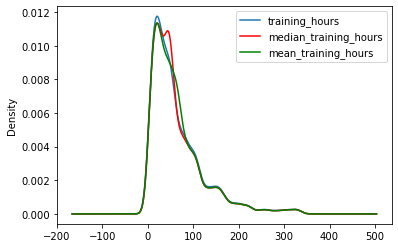

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['training_hours'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['median_training_hours'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['mean_training_hours'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

We can conclude that the distribution is not changing much 

Now our aim is to see if after applying the mean/median imputation the outliars are increasing or not

(array([1, 2, 3]),
 [Text(1, 0, 'city_development_index'),
  Text(2, 0, 'median_city_development_index'),
  Text(3, 0, 'mean_city_development_index')])

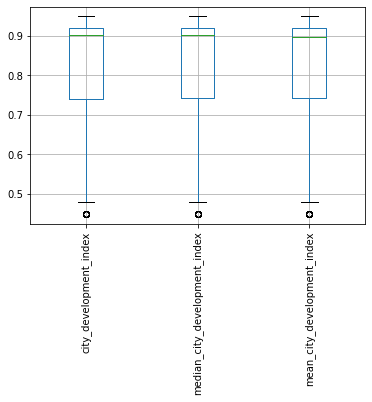

In [32]:
X_train[['city_development_index', 'median_city_development_index', 'mean_city_development_index']].boxplot()
plt.xticks(rotation=90)

(array([1, 2, 3]),
 [Text(1, 0, 'experience'),
  Text(2, 0, 'median_experience'),
  Text(3, 0, 'mean_experience')])

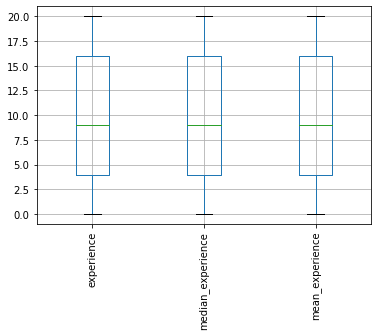

In [33]:
X_train[['experience', 'median_experience', 'mean_experience']].boxplot()
plt.xticks(rotation=90)

(array([1, 2, 3]),
 [Text(1, 0, 'training_hours'),
  Text(2, 0, 'median_training_hours'),
  Text(3, 0, 'mean_training_hours')])

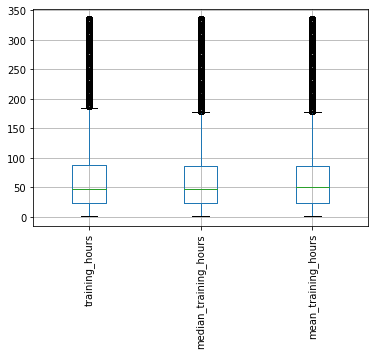

In [34]:
X_train[['training_hours', 'median_training_hours', 'mean_training_hours']].boxplot()
plt.xticks(rotation=90)

We can conclude that although the number of outliers are not increasing but for the column "training_hours" the outliers have increased slightly.

### Categorial data

For categorical data we replace the null value with mode.

In [35]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [36]:
#for categorical column which has less than 5% missing value

<AxesSubplot:>

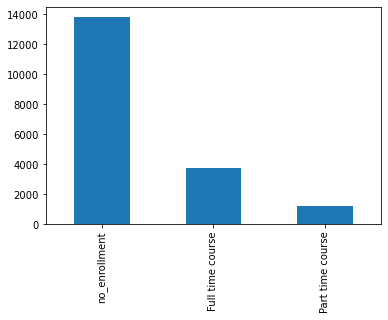

In [37]:
df['enrolled_university'].value_counts().plot(kind='bar')

In [38]:
df['enrolled_university'].mode()

0    no_enrollment
Name: enrolled_university, dtype: object

Text(0.5, 1.0, 'enrolled_university')

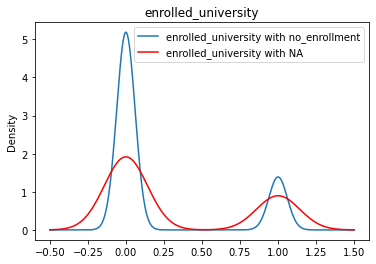

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['enrolled_university']=='no_enrollment']['target'].plot(kind='kde', ax=ax)

df[df['enrolled_university'].isnull()]['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['enrolled_university with no_enrollment', 'enrolled_university with NA']
ax.legend(lines, labels, loc='best')

plt.title('enrolled_university')

In [40]:
temp = df[df['enrolled_university']=='no_enrollment']['target']

In [41]:
df['enrolled_university'].fillna('no_enrollment', inplace=True)

<AxesSubplot:>

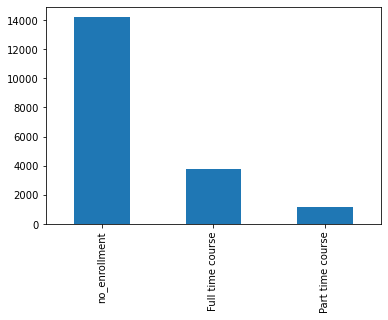

In [42]:
df['enrolled_university'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'enrolled_university')

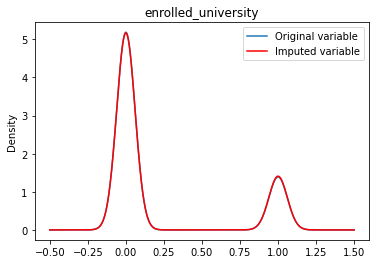

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['enrolled_university']=='no_enrollment']['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('enrolled_university')

#### For categorical column which has more than 5% missing value

<AxesSubplot:>

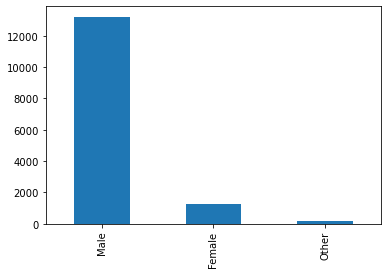

In [44]:
df.gender.value_counts().plot(kind="bar")

In [45]:
df.gender.mode()

0    Male
Name: gender, dtype: object

Text(0.5, 1.0, 'Gender')

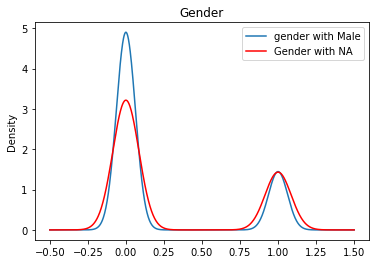

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['gender']=='Male']['target'].plot(kind='kde', ax=ax)

df[df['gender'].isnull()]['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['gender with Male', 'Gender with NA']
ax.legend(lines, labels, loc='best')

plt.title('Gender')

In [47]:
temp = df[df['gender']=='Male']['target']

In [48]:
df['gender'].fillna('Male', inplace=True)

<AxesSubplot:>

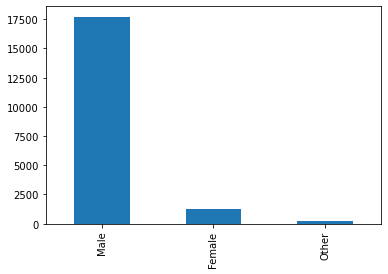

In [49]:
df['gender'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Gender')

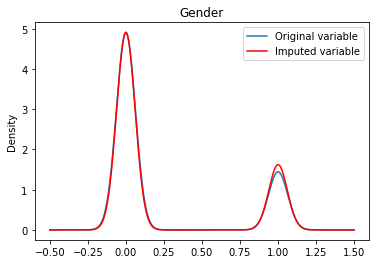

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['gender']=='Male']['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('Gender')

<AxesSubplot:>

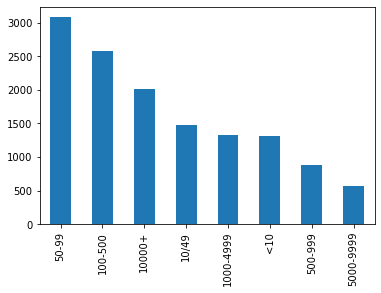

In [51]:
df["company_size"].value_counts().plot(kind="bar")

In [52]:
df["company_size"].mode()

0    50-99
Name: company_size, dtype: object

Text(0.5, 1.0, 'Company Size')

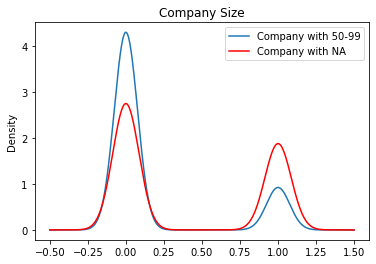

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['company_size']=='50-99']['target'].plot(kind='kde', ax=ax)

df[df['company_size'].isnull()]['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Company with 50-99', 'Company with NA']
ax.legend(lines, labels, loc='best')

plt.title('Company Size')

In [54]:
temp = df[df['company_size']=='50-99']['target']

In [55]:
df['company_size'].fillna('50-99', inplace=True)

<AxesSubplot:>

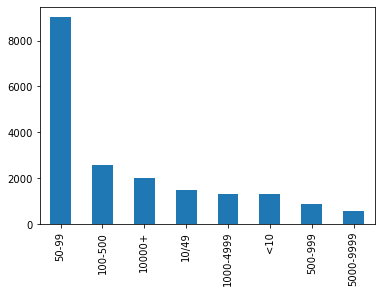

In [56]:
df["company_size"].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Company Size')

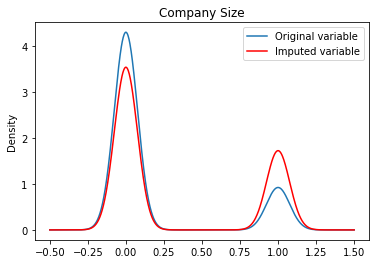

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['company_size']=='50-99']['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('Company Size')

Therefore for categorial data where the mode is not very high than the other values and the amount of missing value is high that is greater than 5%, then on filling the missing values with mode leads to change in the distribution and therfore it should not be used for such data.

### Aribtrary value imputation:
Arbitrary value imputation is a method of handling missing data in which the missing values are replaced with a fixed or arbitrary value. For example in categorical data we replace the null values with the word "Missing" or for neumerical data we replace the null value with some arbritary number. The main objective of doing this is to make the ML algorithim understand that there was a missing value and therefore it can differentiate between the observations which have data from the one not having data. 

In [58]:
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [59]:
#filling the null value of "city_development_index" with 999
df['city_development_index_999'] = df['city_development_index'].fillna(999)

#filling the null value of "experience" with 200
df['experience_200'] = df['experience'].fillna(200)

In [60]:
print('Original city_development_index variable variance: ', df['city_development_index'].var())
print('city_development_index Variance after 999 imputation: ', df['city_development_index_999'].var())


print('Original experience variable variance: ', df['experience'].var())
print('experience Variance after 200 imputation: ', df['experience_200'].var())

Original city_development_index variable variance:  0.015211374664424446
city_development_index Variance after 999 imputation:  24289.67318413606
Original experience variable variance:  42.31851676548554
experience Variance after 200 imputation:  164.33969989345135


We can see after imputing the null values with arbitary numbers the varience increases drastically.

In [61]:
df.cov()

,enrollee_id,city_development_index,experience,training_hours,target,city_development_index_999,experience_200
enrollee_id,9.247308e+07,-46.899255,-2262.377087,1302.791587,205.837604,-9264.131814,-3038.992294
city_development_index,-4.689925e+01,0.015211,0.266895,-0.015343,-0.018154,0.015211,0.227061
experience,-2.262377e+03,0.266895,42.318517,-0.317638,-0.501408,2.839128,42.318517
training_hours,1.302792e+03,-0.015343,-0.317638,3586.288193,-0.562470,-8.740340,3.470822
target,2.058376e+02,-0.018154,-0.501408,-0.562470,0.187183,0.011610,-0.432314
city_development_index_999,-9.264132e+03,0.015211,2.839128,-8.740340,0.011610,24289.673184,6.503726
experience_200,-3.038992e+03,0.227061,42.318517,3.470822,-0.432314,6.503726,164.339700


In [62]:
df.corr()

,enrollee_id,city_development_index,experience,training_hours,target,city_development_index_999,experience_200
enrollee_id,1.000000,-0.039557,-0.036147,0.002263,0.049475,-0.006181,-0.024652
city_development_index,-0.039557,1.000000,0.333050,-0.002083,-0.340239,1.000000,0.143936
experience,-0.036147,0.333050,1.000000,-0.000815,-0.178238,0.002801,1.000000
training_hours,0.002263,-0.002083,-0.000815,1.000000,-0.021706,-0.000929,0.004531
target,0.049475,-0.340239,-0.178238,-0.021706,1.000000,0.000172,-0.077946
city_development_index_999,-0.006181,1.000000,0.002801,-0.000929,0.000172,1.000000,0.003255
experience_200,-0.024652,0.143936,1.000000,0.004531,-0.077946,0.003255,1.000000


The covarience and correlation also changes quite a bit.